**Task-1**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

In [7]:

# Load datasets
customers = pd.read_csv("/content/drive/My Drive/Zeotap/Customers.csv")
products = pd.read_csv("/content/drive/My Drive/Zeotap/Products.csv")
transactions = pd.read_csv("/content/drive/My Drive/Zeotap/Transactions.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ï»¿CustomerID  200 non-null    object        
 1   CustomerName   200 non-null    object        
 2   Region         200 non-null    object        
 3   SignupDate     200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ï»¿ProductID  100 non-null    object 
 1   ProductName   100 non-null    object 
 2   Category      100 non-null    object 
 3   Price         100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 # 

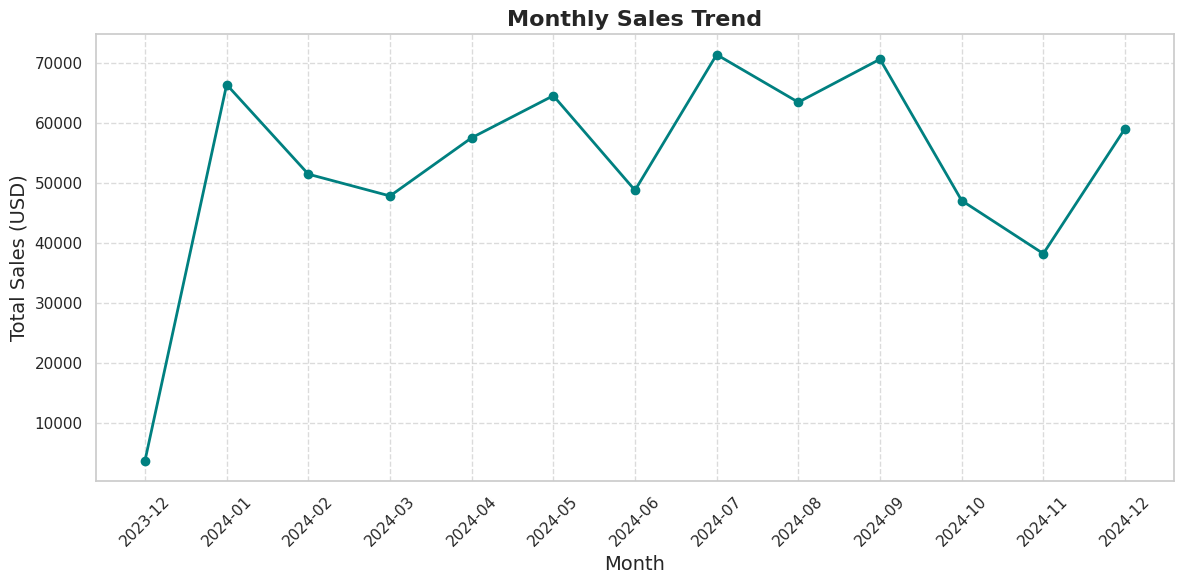

Top 10 High-Spending Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


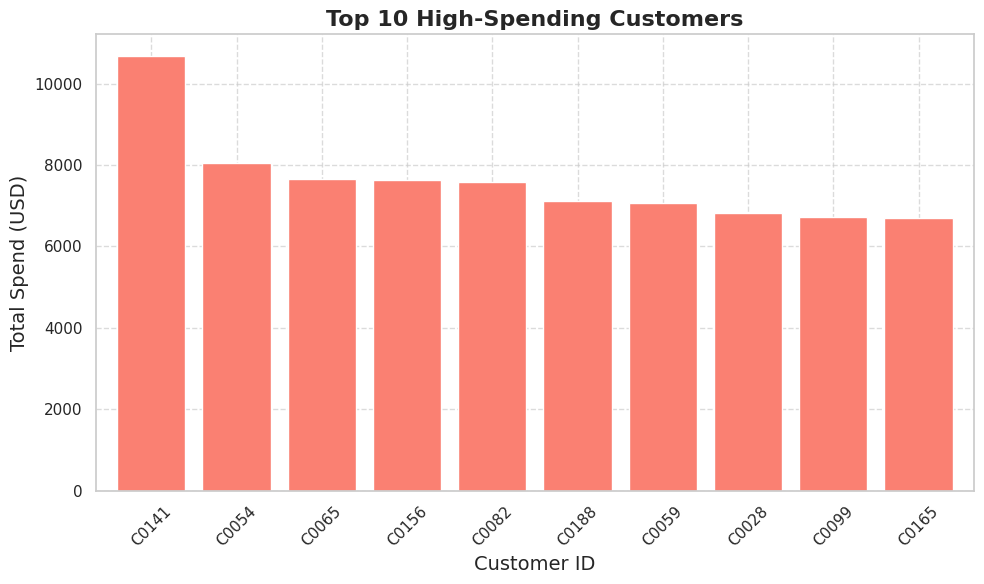

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Sample data loading (assuming customers, products, and transactions are already loaded into DataFrames)
# customers = pd.read_csv('path_to_customers.csv')
# products = pd.read_csv('path_to_products.csv')
# transactions = pd.read_csv('path_to_transactions.csv')

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# 1. General EDA
print(customers.info())
print(products.info())
print(transactions.info())

print(customers.describe())
print(products.describe())
print(transactions.describe())

# 2. Customer analysis
customers_by_region = customers['Region'].value_counts()
print("Customers by Region:\n", customers_by_region)

# 3. Product analysis
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top Products by Quantity Sold:\n", top_products)

# 4. Transaction analysis
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plotting monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='teal', linewidth=2, markersize=6)
plt.title("Monthly Sales Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. High-value customers
customer_spend = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 High-Spending Customers:\n", customer_spend)

# Optional: Plot top 10 high-spending customers
plt.figure(figsize=(10, 6))
customer_spend.plot(kind='bar', color='salmon', width=0.8)
plt.title("Top 10 High-Spending Customers", fontsize=16, fontweight='bold')
plt.xlabel("Customer ID", fontsize=14)
plt.ylabel("Total Spend (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


  ï»¿CustomerID        CustomerName         Region  SignupDate
0         C0001    Lawrence Carroll  South America  2022-07-10
1         C0002      Elizabeth Lutz           Asia  2022-02-13
2         C0003      Michael Rivera  South America  2024-03-07
3         C0004  Kathleen Rodriguez  South America  2022-10-09
4         C0005         Laura Weber           Asia  2022-08-15
  ï»¿ProductID              ProductName     Category   Price
0         P001     ActiveWear Biography        Books  169.30
1         P002    ActiveWear Smartwatch  Electronics  346.30
2         P003  ComfortLiving Biography        Books   44.12
3         P004            BookWorld Rug   Home Decor   95.69
4         P005          TechPro T-Shirt     Clothing  429.31
  ï»¿TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0           T00001      C0199      P067  2024-08-25 12:38:23         1   
1           T00112      C0146      P067  2024-05-27 22:23:54         1   
2           T00166      C0127     

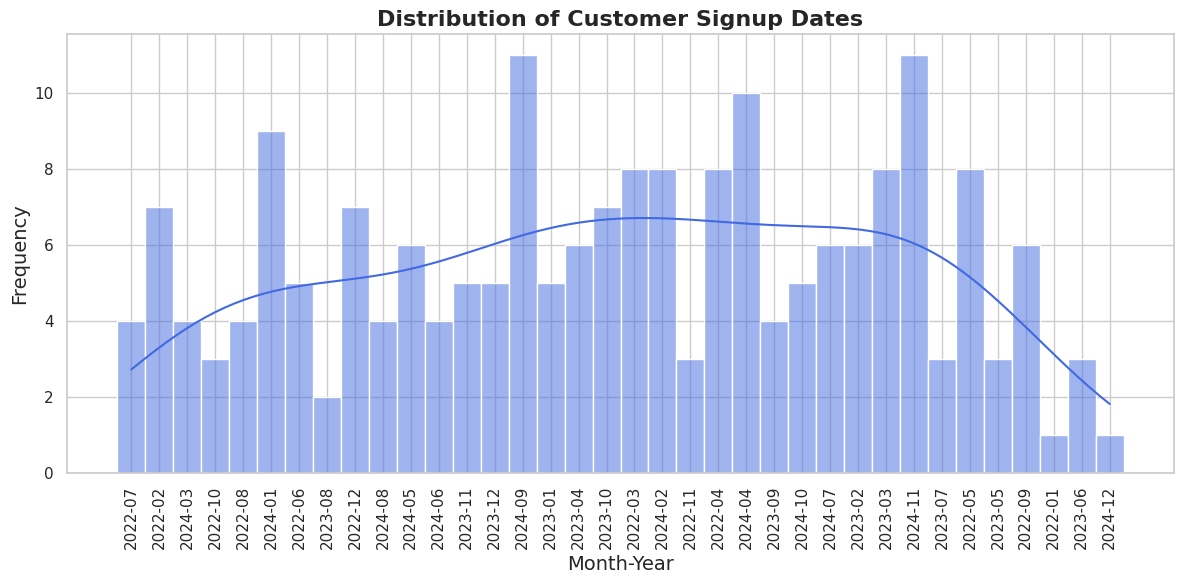

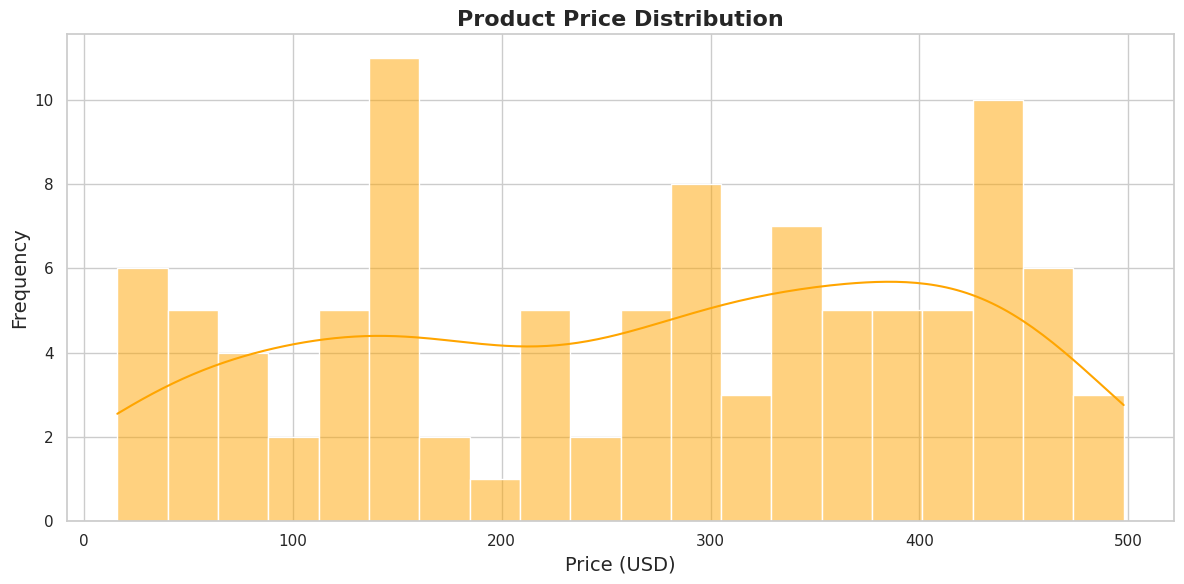

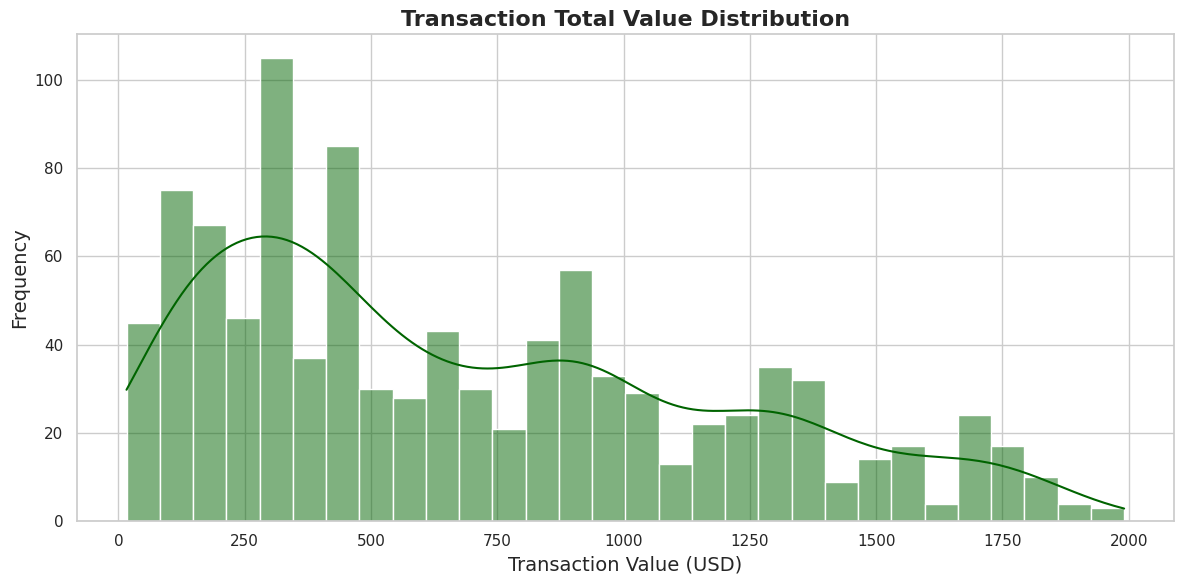

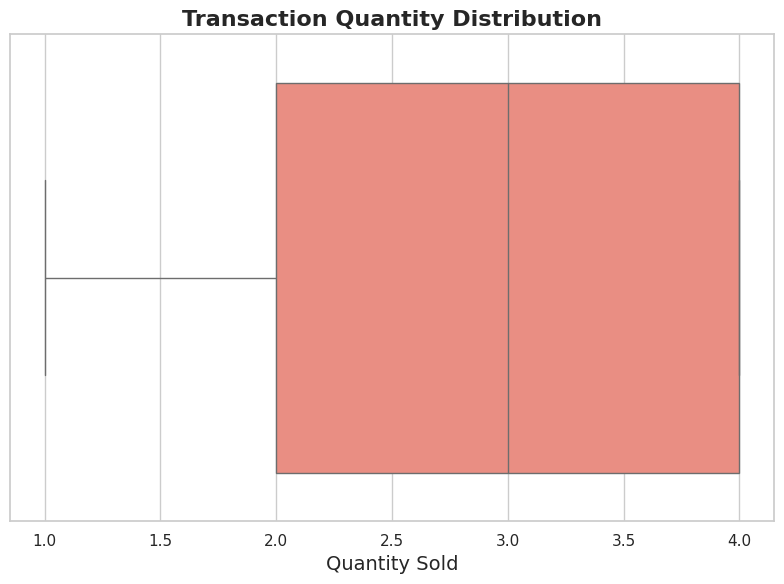

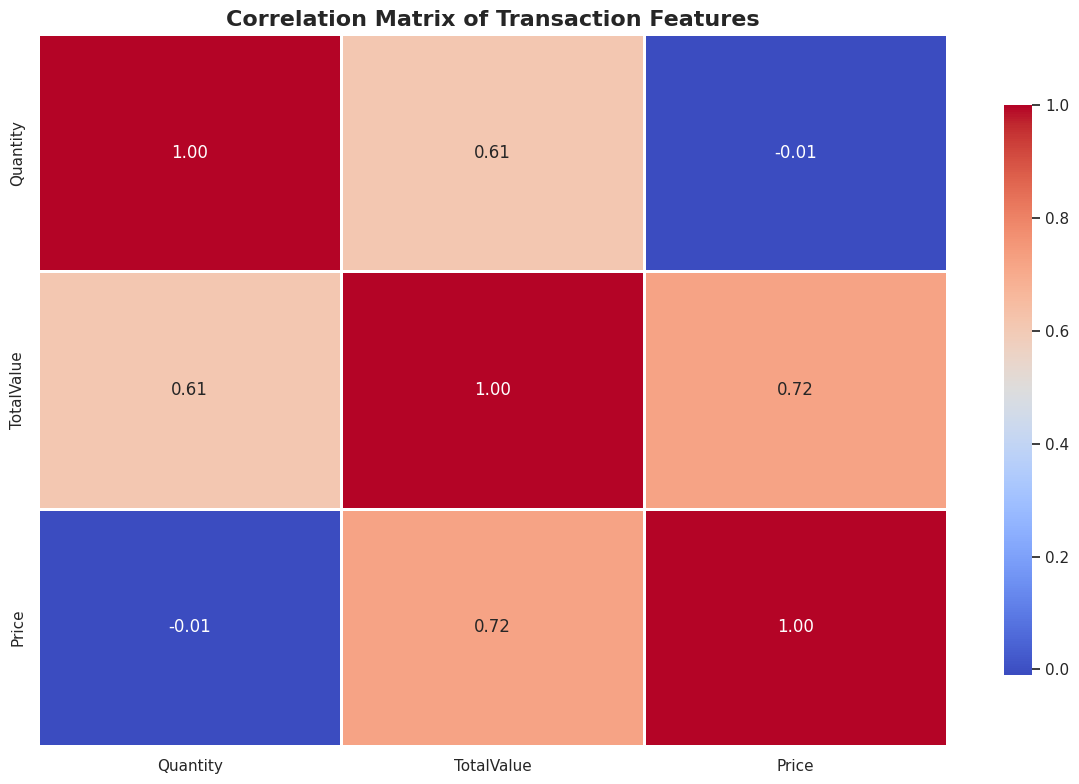

<ipython-input-23-88eb1989433d>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customer_df, palette='Set2')


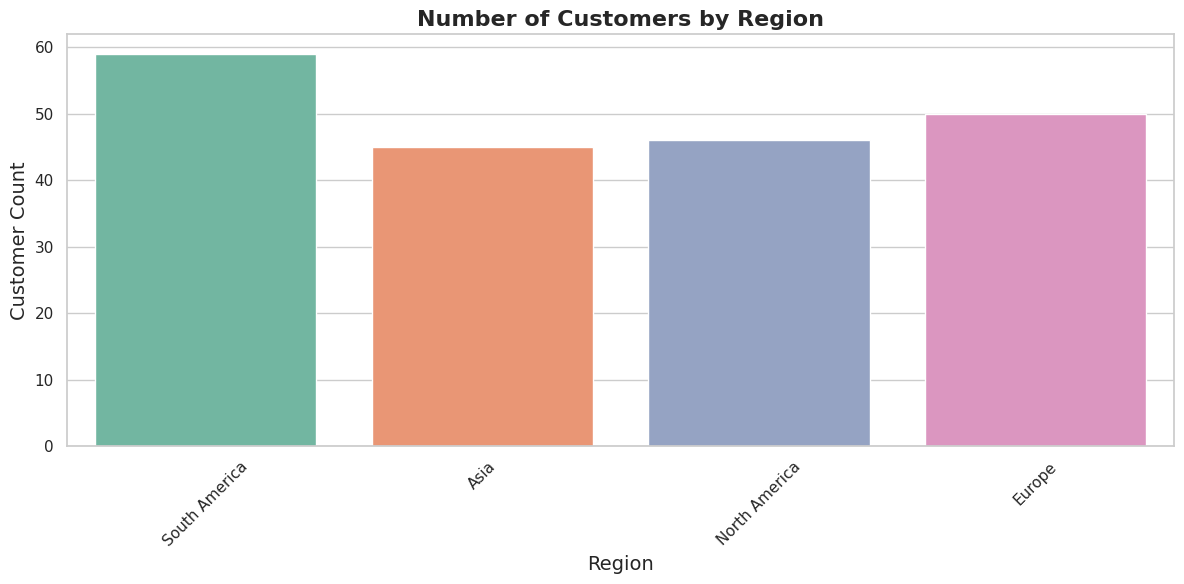


Top 10 High-Spending Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


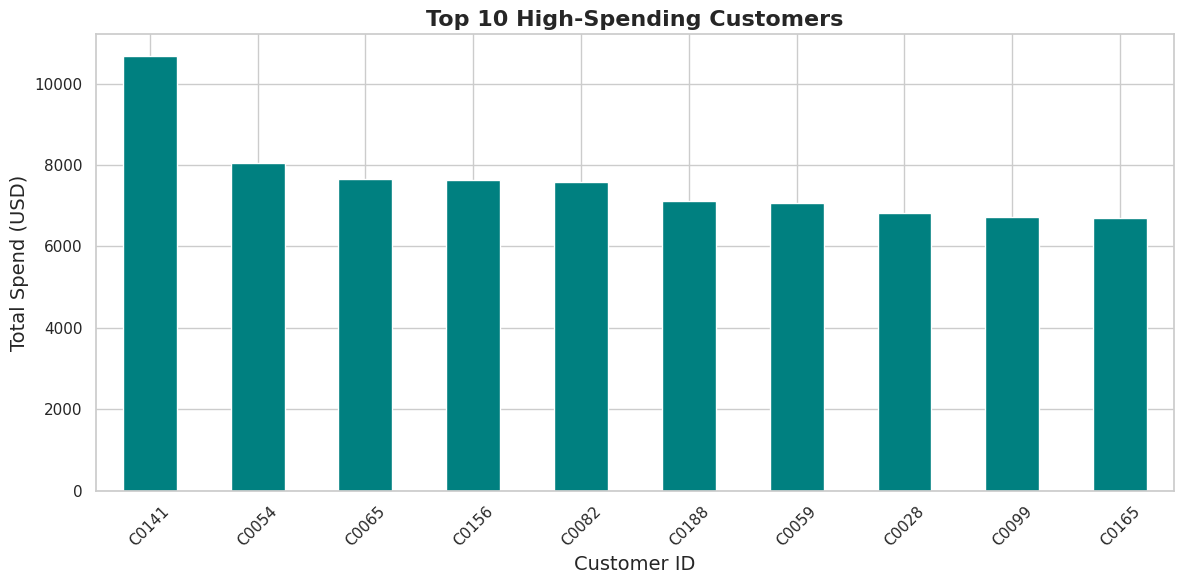


Top 10 Most Sold Products:
ProductID
P054    46
P059    46
P029    45
P048    43
P057    43
P061    43
P079    43
P062    39
P020    38
P022    38
Name: Quantity, dtype: int64


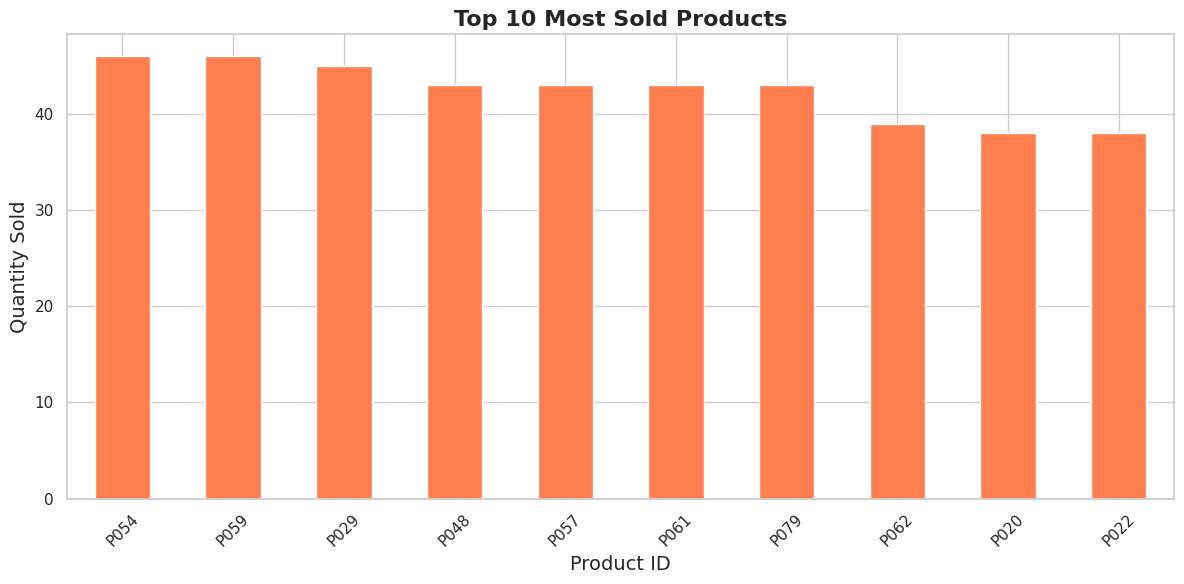

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (assuming the paths are correct and the files exist)
customer_df = pd.read_csv("/content/drive/My Drive/Zeotap/Customers.csv")
product_df = pd.read_csv("/content/drive/My Drive/Zeotap/Products.csv")
transaction_df = pd.read_csv("/content/drive/My Drive/Zeotap/Transactions.csv")

# Preview the datasets (First 5 rows)
print(customer_df.head())
print(product_df.head())
print(transaction_df.head())

# Check for missing values in the datasets
print("\nMissing values:")
print(customer_df.isnull().sum())
print(product_df.isnull().sum())
print(transaction_df.isnull().sum())

# Summary Statistics
print("\nSummary Statistics:")
print(customer_df.describe())
print(product_df.describe())
print(transaction_df.describe())

# Set Seaborn Style for better visualization
sns.set(style="whitegrid")

# Distribution of Customer Signup Dates
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of Customer Signup Dates
# Ensure 'SignupDate' is in datetime format
customer_df['SignupDate'] = pd.to_datetime(customer_df['SignupDate'])

# Create a new column for month-year (e.g., 'January 2021', 'February 2021')
customer_df['Month_Year'] = customer_df['SignupDate'].dt.to_period('M')

# Convert 'Month_Year' to string before plotting
customer_df['Month_Year'] = customer_df['Month_Year'].astype(str) # This line is changed to fix the error


# Plot the distribution with Month-Year on the x-axis in correct order
plt.figure(figsize=(12, 6))
sns.histplot(customer_df['Month_Year'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Customer Signup Dates', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



# Product Price Distribution
plt.figure(figsize=(12, 6))
sns.histplot(product_df['Price'], bins=20, kde=True, color='orange')
plt.title('Product Price Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

# Transaction Amount Distribution
plt.figure(figsize=(12, 6))
sns.histplot(transaction_df['TotalValue'], bins=30, kde=True, color='darkgreen')
plt.title('Transaction Total Value Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Value (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

# Boxplot of Quantity Sold
plt.figure(figsize=(8, 6))
sns.boxplot(x=transaction_df['Quantity'], color='salmon')
plt.title('Transaction Quantity Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold', fontsize=14)
plt.tight_layout()
plt.show()

# Correlation Matrix for Numeric Features
plt.figure(figsize=(12, 8))
numeric_transaction_df = transaction_df.select_dtypes(include=['number'])  # Numeric columns
sns.heatmap(numeric_transaction_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Transaction Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualize the most common regions
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=customer_df, palette='Set2')
plt.title('Number of Customers by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Total Spend by High-Spending Customers (Top 10)
top_customers = transaction_df.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
print("\nTop 10 High-Spending Customers:")
print(top_customers)

# Plotting Top 10 High-Spending Customers
plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar', color='teal')
plt.title('Top 10 High-Spending Customers', fontsize=16, fontweight='bold')
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Total Spend (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Most Sold Products (Top 10)
top_products = transaction_df.groupby('ProductID')['Quantity'].sum().nlargest(10)
print("\nTop 10 Most Sold Products:")
print(top_products)

# Plotting Top 10 Most Sold Products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='coral')
plt.title('Top 10 Most Sold Products', fontsize=16, fontweight='bold')
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
